## installing packages and libraries

In [17]:
# Importing the libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# text preprocessing of reviews
# libraries for text preprocessing
import re
import string
from bs4 import BeautifulSoup
!pip install contractions
import contractions
from contractions import fix
!pip install emoji
import emoji
!pip install pyspellchecker
from spellchecker import SpellChecker
spell = SpellChecker()
# tokenization
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
# Stop word removal
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('words')
words_eng = set(nltk.corpus.words.words())


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import load_model

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


## Defining functions

In [2]:
# Converting test to tolowercase, remove punctuation, numbers, special characters, and HTML tags, expanding contractions, handling emojis and spell correction
def clean_text(text):
    text = text.lower()  # Lowercase
    # Replace certain special characters
    text = text.replace('%', ' percent')
    text = text.replace('$', ' dollar ')
    text = text.replace('₹', ' rupee ')
    text = text.replace('€', ' euro ')
    text = text.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    text = text.replace('[math]', '')

    # Replacing some numbers with string eqivalents (not perfect, can be done better to account for more cases)
    text = text.replace(',000,000,000', 'b ')
    text = text.replace(',000,000', 'm ')
    text = text.replace(',000', 'k ')
    text = re.sub(r'([0-9]+)000000000', r'\1b', text)
    text = re.sub(r'([0-9]+)000000', r'\1m', text)
    text = re.sub(r'([0-9]+)000', r'\1k', text)

    # text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove non word and non white space characters
    text = " ".join([contractions.fix(doc) for doc in text.split()]) # expanding text contractions
    text = " ".join([emoji.demojize(doc) for doc in text.split()]) # handling emojis
    # text = " ".join([spell.correction(doc) for doc in text.split()]) # spell corrections
    # # stop word removal
    text=' '.join(word for word in text.split() if word not in stop_words)
    # removing non english words
    text = " ".join(w for w in text.split() if w in words_eng or not w.isalpha())
    return text

In [3]:
# Confusion metrics for predictions
def conf_matrix(cf_matrix):
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ['{0:0.0f}'.format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

## Data upload and Text Preprocessing

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Career/AI/DL Projects/IMDB Reviews Sentiment Analysis/IMDB Dataset.csv')

In [5]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [6]:
df.shape

(50000, 2)

In [7]:
df.sentiment.value_counts()

,count
sentiment,
positive,25000
negative,25000


In [8]:
df['sentiment']=df['sentiment'].apply(lambda x : 1 if x=='positive' else 0)
df.sentiment.value_counts()

,count
sentiment,
1,25000
0,25000


In [10]:
# text preprocessing
df['review']=df['review'].apply(clean_text)

In [11]:
pd.set_option('display.max_colwidth', None)
df.head(5)

,review,sentiment
0,one watching 1 episode hooked right exactly first thing struck brutality unflinching violence set right word go trust show faint hearted timid show sex violence classic use nickname given maximum security state mainly emerald city experimental section prison glass face inwards privacy high agenda city home death dodgy shady never far would say main appeal show due fact goes would dare forget pretty painted forget charm forget mess around first episode ever saw struck nasty could say ready watched taste got accustomed high graphic violence violence injustice crooked sold nickel kill order get away well mannered middle class turned prison due lack street prison experience watching may become comfortable uncomfortable get touch side,1
1,wonderful little production technique unassuming fashion comforting sometimes discomforting sense realism entire piece extremely well chosen sheen got pat truly see seamless diary well worth watching terrificly written piece masterful production one great comedy life realism really comes home little fantasy guard rather use traditional dream remains solid knowledge particularly concerning particularly flat every surface terribly well done,1
2,thought wonderful way spend time hot summer weekend sitting air conditioned theater watching lighthearted comedy plot simplistic dialogue witty likable even well bread suspected serial killer may disappointed realize match point 2 risk addiction thought proof woody still fully control style many us grown id one dare say decade never scarlet tone sexy image right average spirited young may crown jewel career devil interesting superman great comedy go see,1
3,basically family little boy jake zombie closet fighting movie soap opera suddenly jake become kill first going make film must decide thriller drama drama movie watchable like real life jake closet totally film see similar movie instead watched drama meaningless thriller 3 10 well descent jake ignore,0
4,petter love time money visually stunning film watch us vivid portrait human movie telling us money power success people different encounter variation play theme director action present time new york different meet connect one connected one way another next person one know previous point contact stylishly film sophisticated luxurious look taken see people live world live thing one picture different loneliness one big city exactly best place human find sincere fulfillment one case people acting good direction rosario carol rest talented cast make come wish good luck await anxiously next work,1


In [12]:
pd.set_option('display.max_colwidth', 50)
df.head(5)

,review,sentiment
0,one watching 1 episode hooked right exactly fi...,1
1,wonderful little production technique unassumi...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake zombie closet...,0
4,petter love time money visually stunning film ...,1


In [13]:
# Storing the processed dataframe for further use
import pickle
pickle_path = '/content/drive/MyDrive/Career/AI/DL Projects/IMDB Reviews Sentiment Analysis/'
pickle_out=open(pickle_path+'df.pickle', 'wb')
pickle.dump(df,pickle_out)
pickle_out.close()

In [14]:
# Importing the final featurized dataframe
pickle_in=open("/content/drive/MyDrive/Career/AI/DL Projects/IMDB Reviews Sentiment Analysis/df.pickle","rb")
df=pickle.load(pickle_in)
pickle_in.close()
print("Shape of featurized df_final dataframe is",df.shape)

Shape of featurized df_final dataframe is (50000, 2)


## Train test split

In [16]:
# Lets build the model considering first 20,000 rows. Train test split will happen on these 20000 rows. Rest 30000 will be used as OOT
df_train_test=df.iloc[:20000]
df_oot=df.iloc[20000:]
print(df_train_test.shape)
print(df_oot.shape)
df_train_test.sentiment.value_counts()

(20000, 2)
(30000, 2)


,count
sentiment,
0,10097
1,9903


In [18]:
# lets train test split the data
x_train, x_test, y_train, y_test = train_test_split(df_train_test['review'], df_train_test['sentiment'], test_size=0.1, random_state=42)

In [19]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (18000,)
y_train shape: (18000,)
x_test shape: (2000,)
y_test shape: (2000,)


In [20]:
x_train

,review
16270,remember lyricist brother film snapped many ty...
1383,caught farewell king cable maybe girl thought ...
3472,like anybody make movie nowadays like need cam...
19900,concept behind horror something going horror l...
2150,usually write comment many time feel spoken ta...
...,...
11284,shadow magic joy amazement first movie also po...
11964,taken premise film good one good film require ...
5390,cannot knock film terribly obvious midway watc...
860,production quite surprise absolutely love obsc...


## Tokenization research
We need to use a sentence representation method for each sentence. As the vocab size of train itself is very high, using the same vocab size will result in very high training time. We need to do following 3 tasks:
1. Select the correct representation method
2. select the suitable vocab size
3. select the suitable sentence length

In [ ]:
# 1. compute the vocab frequency using countvectorizer
# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit and transform the documents
vectorized_data = vectorizer.fit_transform(x_train)
print('Vocab size is',len(vectorizer.get_feature_names_out()))
print(vectorizer.get_feature_names_out()) # get the feature names
print(vectorized_data.toarray().sum(axis=0)) # get the frequency of each word in the entire corpus. There can be duplicates in a single sentence

lst1=vectorizer.get_feature_names_out().tolist()
lst2=vectorized_data.toarray().sum(axis=0).tolist()

dic=dict(zip(lst1,lst2))
dic2={k: v for k, v in sorted(dic.items(), key=lambda item: item[1],reverse=True)}
{k: dic2[k] for k in list(dic2)[:10]} # display top 10 frequent words

Vocab size is 27244
['00' '000' '0001' ... 'zoom' 'zoom2006' 'zorro']
[ 8  2  1 ... 18  1 18]


{'movie': 30192,
 'film': 26717,
 'one': 18373,
 'like': 14087,
 'good': 10416,
 'would': 10276,
 'even': 8891,
 'time': 8362,
 'really': 8230,
 'see': 8137}

In [ ]:
vectorizer.transform(['00 00']).toarray()

array([[2, 0, 0, ..., 0, 0, 0]])

In [ ]:
# 2. Test keras tokenizer on test string
t  = Tokenizer()
t.fit_on_texts(x_train)
test_text = ["br movie film one hot"]
sequences = t.texts_to_sequences(test_text)
print("sequences : ",sequences,'\n')
print("word_index : ",{k: t.word_index[k] for k in list(t.word_index)[:10]})

sequences :  [[1, 2, 3, 614]] 

word_index :  {'movie': 1, 'film': 2, 'one': 3, 'like': 4, 'good': 5, 'would': 6, 'even': 7, 'time': 8, 'really': 9, 'see': 10}


In [ ]:
# 3. Test keras one_hot on test string
# integer encode the documents
vocab_size = len(vectorizer.get_feature_names_out())
encoded_docs = [one_hot(d, vocab_size) for d in test_text]
print(encoded_docs)

[[12187, 11590, 14841, 16719, 24534]]


From above 3 methods it is clear that keras toeknizer follows frequency for sentence representation. It is not clear how one_hot is working and its representation for small vocabulary size.
### Lets estimate the vocab size based on histogram

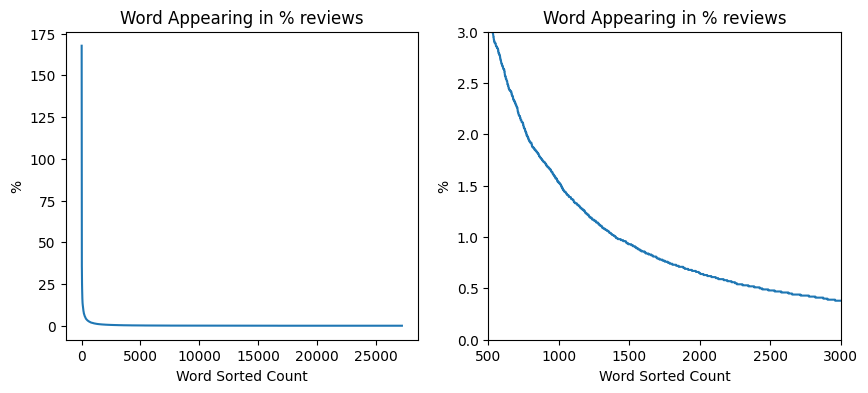

In [ ]:
# in the following graph it is assumd that freq=1 means it is occuring in one sentence. However freq is computed based on duplicates allowed in a sentence.
%matplotlib inline
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot([i for i in range(len(dic2.values()))], [round(i/len(x_train)*100,2) for i in dic2.values()])
plt.title('Word Appearing in % reviews')
plt.ylabel('%')
plt.xlabel('Word Sorted Count')

plt.subplot(1,2,2)
plt.plot([i for i in range(len(dic2.values()))], [round(i/len(x_train)*100,2) for i in dic2.values()])
plt.title('Word Appearing in % reviews')
plt.ylabel('%')
plt.xlabel('Word Sorted Count')
plt.xlim(500,3000)
plt.ylim(0,3)

plt.show()

First 1000 words are appearing in 1.5% of reviews. First 3000 words are appearing in 0.5% of reviews. So based on this, we can initilize the word representation restricted to around 1000 words.
### Deciding the sentence length for padding

In [ ]:
dff=pd.DataFrame(x_train,columns=['review'])
dff['len']=dff.review.apply(lambda x : len(x.split()))
pd.set_option('display.max_colwidth', 50)
dff.head(5)

,review,len
16270,remember lyricist brother film snapped many ty...,149
1383,caught farewell king cable maybe girl thought ...,53
3472,like anybody make movie nowadays like need cam...,129
19900,concept behind horror something going horror l...,181
2150,usually write comment many time feel spoken ta...,315


In [ ]:
pd.set_option('display.max_colwidth', None)
dff[dff.len==dff.len.min()]

,review,len
18424,unlikeable script awful waste,4
18400,brilliant moving peter finch,4


In [ ]:
dff[dff.len==dff.len.max()]

review  \
12647  titanic directed fictional love story historical setting titanic plot simple love twist turn keep suspense end movie figured within start film love story interesting one however wonderful rose aristocratic young lady betrothed cal billy early voyage rose jack lower class artist way winning ticket aboard titanic poker game something goes unlike upper class concerned social two fall love audience sinking titanic primarily movie modern times exploration wreck group searching sunk titanic recently one titanic rose exploration wreck television flown boat search led tell help search telling memory one voyage titanic scene titanic set sail 10 1912 boarding another stop coast titanic went see maiden voyage across atlantic bound new york historically first days voyage went uneventful fictional plot story time rose hopeless engagement wealthy cal love third class passenger jack captain smith shown movie white star line director increase speed ship would make newspaper receive extra publicity new york night morning smith ordered fateful decision going experience stretch full speed titanic atlantic sailing full full speed shown movie 15 1912 1139 iceberg sighted shut turn ship path iceberg enough time ship hit iceberg starboard side film portrayal many small side ship one large gash along side accurate crew titanic sent distress set distress shown 218 finally spotted six away realize going respond many help tried day warn titanic severe ice stop trip titanic brushed causing turn radio leave titanic first class first put twenty ship overwhelmingly third class amount class crew hit hard tragedy word white star line first class second third class trying gain information sinking also metal used build titanic found recent severe cold experienced night titanic sank extremely brittle overall basic plot accurate times took place many story real simply purpose movie composite represent possible people ship core group rose jack cal mother fictional added story represent different people time yet many unsinkable molly brown captain smith ship designer white star line representative real maiden voyage going captain last voyage anyway retire afterwards part white star line since 1880 worked way status captain titanic sunk accurate four tragedy except officer kill ship pistol record acting heroicly point monument honor former shown movie language problem crew many speaking addition officer officer came back lifeboat old people shown bed water came room based wanting leave side get lifeboat husband titanic furthermore shown brandy smoking cigar reportedly go like dressed best man ship astor nonetheless well much younger wife saved lifeboat addition molly brown saved later made crew picked titanic water ticket titanic cost end life ended broke ship masterfully last china silverware gymnasium hardly seen perfectly match seen old wonderful costuming excellent recreation era 1912 rich time practically everything suffrage movement quite gotten moving yet time often married financial security rose considering normally took back status cal wished rose rich take well new money molly brown everything time formal dinner male figure seen dining smoking common among time coming time used seen rose movie men time generally smoked physically socially society although background historical brought titanic coupled two spent history titanic taken beautiful cinematography special effects also make film even recognizable message seen movie titanic people ship three contemplate demise director various time crisis everyone differently think might situation titanic fateful night addition film reflection 1990s produced look wreck titanic past fifteen site actual titanic found movie able give us look disaster many would however moral question whether people today taking wreck underwater graveyard stop treasure seeking one titanic today anyone make voyage titanic take whatever film showing general time technically film well done get footage wreck bottom ocean t

In [ ]:
dff.sort_values(by=['len'],ascending=False,inplace=True)

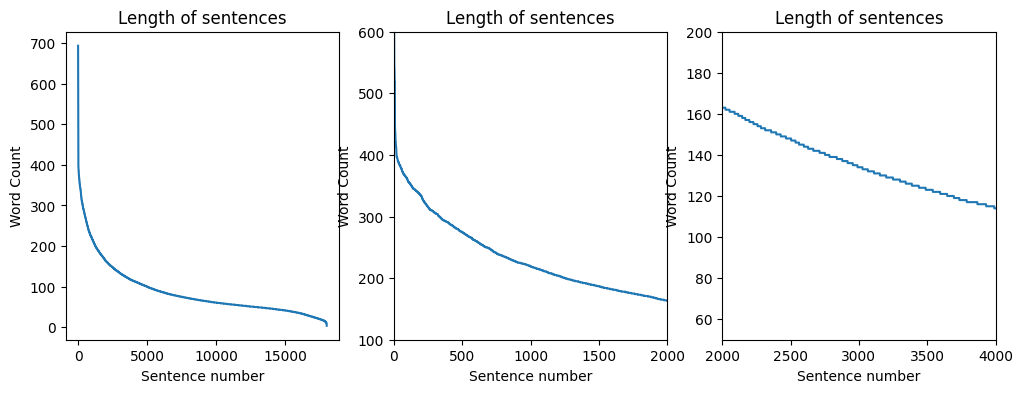

In [ ]:
%matplotlib inline
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot([i for i in range(len(dff))], dff.len.to_list())
plt.title('Length of sentences')
plt.ylabel('Word Count')
plt.xlabel('Sentence number')

plt.subplot(1,3,2)
plt.plot([i for i in range(len(dff))], dff.len.to_list())
plt.title('Length of sentences')
plt.ylabel('Word Count')
plt.xlabel('Sentence number')
plt.xlim(0,2000)
plt.ylim(100,600)

plt.subplot(1,3,3)
plt.plot([i for i in range(len(dff))], dff.len.to_list())
plt.title('Length of sentences')
plt.ylabel('Word Count')
plt.xlabel('Sentence number')
plt.xlim(2000,4000)
plt.ylim(50,200)

plt.show()

We can restrict the sentence length to 120. By doing so around top 3500 length sentences out of 18000 will be limited to 100 count.

## Word embedding

In [21]:
# keras tokenizer on test string
max_features=1000
tokenize  = Tokenizer(num_words=max_features,oov_token='<oov>')
tokenize.fit_on_texts(x_train)

In [22]:
x_train_features=tokenize.texts_to_sequences(x_train)
x_test_features=tokenize.texts_to_sequences(x_test)
print(x_train_features[0])
print(x_test_features[0])

[241, 1, 442, 3, 1, 26, 510, 1, 2, 465, 1, 1, 344, 65, 206, 1, 131, 517, 1, 465, 469, 517, 579, 1, 987, 131, 4, 30, 664, 2, 465, 4, 311, 584, 733, 39, 541, 25, 220, 74, 483, 1, 1, 1, 1, 9, 492, 305, 3, 707, 1, 8, 1, 707, 1, 13, 1, 1, 1, 93, 1, 9, 1, 371, 707, 1, 29, 51, 631, 68, 238, 255, 8, 32, 75, 417, 1, 14, 41, 1, 1, 55, 1, 41, 74, 1, 331, 1, 31, 14, 1, 8, 47, 1, 105, 59, 74, 90, 1, 1, 1, 1, 1, 465, 73, 1, 43, 693, 1, 1, 19, 128, 31, 1, 120, 1, 3, 331, 1, 1, 45, 3, 298, 256, 98, 18, 1, 128, 585, 135, 1, 1, 25, 465, 13, 153, 109, 1, 98, 13, 304, 494, 1, 264, 1, 279, 6, 1, 1]
[70, 1, 147, 294, 166, 4, 34, 106, 39, 18, 611, 287, 143, 6, 163, 868, 609, 106, 6, 1, 1, 811, 1, 677, 486, 44, 6, 1, 1, 295, 759, 31, 6, 611, 1, 1, 659, 125, 373, 28, 87, 466, 375, 75, 435, 467, 636, 1, 638, 347, 201, 1, 28, 50, 601, 435, 37]


In [23]:
print(len([max(i) for i in x_train_features]))
print(max([max(i) for i in x_train_features])+1) # vocab size

18000
1000


In [24]:
sent_length=120
x_train_embedded_docs=pad_sequences(x_train_features,padding='pre',maxlen=sent_length)
x_test_embedded_docs=pad_sequences(x_test_features,padding='pre',maxlen=sent_length)

In [25]:
print(x_train_embedded_docs[0])
print(x_test_embedded_docs[0])

[  2 465   4 311 584 733  39 541  25 220  74 483   1   1   1   1   9 492
 305   3 707   1   8   1 707   1  13   1   1   1  93   1   9   1 371 707
   1  29  51 631  68 238 255   8  32  75 417   1  14  41   1   1  55   1
  41  74   1 331   1  31  14   1   8  47   1 105  59  74  90   1   1   1
   1   1 465  73   1  43 693   1   1  19 128  31   1 120   1   3 331   1
   1  45   3 298 256  98  18   1 128 585 135   1   1  25 465  13 153 109
   1  98  13 304 494   1 264   1 279   6   1   1]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  70   1 147 294 166   4  34 106  39
  18 611 287 143   6 163 868 609 106   6   1   1 811   1 677 486  44   6
   1   1 295 759  31   6 611   1   1 659 125 373  28  87 466 375  75 435
 467 636   1 638 347 201   1  28  50 601 435  37]


In [26]:
# verification for padding
print(len(x_train_features))
print(len(x_train_features[0]))
print(len(x_test_features[0]))
print(x_train_features[0][149-120:149-115]) # this is limited to sentence length

18000
149
57
[2, 465, 4, 311, 584]


## Simple RNN Model

In [ ]:
# simple RNN model
model=Sequential()
model.add(Embedding(input_dim=max_features,output_dim=128,input_length=sent_length))
model.add(SimpleRNN(128))
model.add(Dense(1,activation='sigmoid'))
model.build(input_shape=(None, sent_length))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 120, 128)            │         128,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161,025 (629.00 KB)

 Trainable params: 161,025 (629.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# early stopping callback
earlystopping=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
earlystopping

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(x_train_embedded_docs, y_train, epochs=30, batch_size=32, validation_split=0.2,callbacks=earlystopping)

Epoch 1/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 38s 70ms/step - accuracy: 0.5490 - loss: 0.6843 - val_accuracy: 0.7489 - val_loss: 0.5109
Epoch 2/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 38s 64ms/step - accuracy: 0.7595 - loss: 0.5073 - val_accuracy: 0.6739 - val_loss: 0.6373
Epoch 3/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 42s 66ms/step - accuracy: 0.7478 - loss: 0.5261 - val_accuracy: 0.7700 - val_loss: 0.5229
Epoch 4/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.7845 - loss: 0.4775 - val_accuracy: 0.7906 - val_loss: 0.4821
Epoch 5/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - accuracy: 0.8103 - loss: 0.4402 - val_accuracy: 0.7250 - val_loss: 0.5436
Epoch 6/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 38s 63ms/step - accuracy: 0.7718 - loss: 0.4583 - val_accuracy: 0.6178 - val_loss: 0.6449
Epoch 7/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - accuracy: 0.6859 - loss: 0.5900 - val_accuracy: 0.5964 - val_loss: 0.6488
Epoch 8/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - accuracy: 0.6550 - loss: 0.6075 - 

In [ ]:
# save model file
model.save('/content/drive/MyDrive/Career/AI/DL Projects/IMDB Reviews Sentiment Analysis/simple_rnn.h5')

In [28]:
model = load_model('/content/drive/MyDrive/Career/AI/DL Projects/IMDB Reviews Sentiment Analysis/simple_rnn.h5')

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 120, 128)            │         128,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 483,077 (1.84 MB)

 Trainable params: 161,025 (629.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 322,052 (1.23 MB)

In [25]:
model.get_weights()

[array([[-0.05353747, -0.00928404, -0.04966497, ...,  0.05534275,
         -0.09290755, -0.00524393],
        [ 0.00540955, -0.02544587,  0.0244429 , ..., -0.00115921,
         -0.01920632,  0.00164595],
        [-0.03740831, -0.02760127, -0.01012691, ...,  0.01748374,
         -0.04455395,  0.02780363],
        ...,
        [-0.00900158,  0.01810393,  0.03492569, ...,  0.10956692,
          0.04475475,  0.0089254 ],
        [-0.1195014 ,  0.04720624, -0.05831743, ...,  0.05966747,
          0.10345164, -0.09021014],
        [ 0.03316796, -0.03034955, -0.03516747, ...,  0.09615241,
          0.05101144, -0.00454313]], dtype=float32),
 array([[-0.03950335,  0.02408159,  0.01916153, ..., -0.11228776,
         -0.00632721, -0.04841031],
        [ 0.08522662, -0.10748252,  0.11133328, ..., -0.01762239,
          0.01996085, -0.00449618],
        [ 0.10729121,  0.09531286,  0.01511277, ...,  0.09531273,
          0.06800382, -0.16828664],
        ...,
        [ 0.11285187, -0.17016032,  0.1

In [26]:
model.get_weights()[0]

array([[-0.05353747, -0.00928404, -0.04966497, ...,  0.05534275,
        -0.09290755, -0.00524393],
       [ 0.00540955, -0.02544587,  0.0244429 , ..., -0.00115921,
        -0.01920632,  0.00164595],
       [-0.03740831, -0.02760127, -0.01012691, ...,  0.01748374,
        -0.04455395,  0.02780363],
       ...,
       [-0.00900158,  0.01810393,  0.03492569, ...,  0.10956692,
         0.04475475,  0.0089254 ],
       [-0.1195014 ,  0.04720624, -0.05831743, ...,  0.05966747,
         0.10345164, -0.09021014],
       [ 0.03316796, -0.03034955, -0.03516747, ...,  0.09615241,
         0.05101144, -0.00454313]], dtype=float32)

In [27]:
model.get_weights()[0].shape # embedding layer weights

(1000, 128)

In [28]:
model.get_weights()[0][0].shape # first word to embedding layer wt

(128,)

In [29]:
model.get_weights()[1].shape # RNN input layer wt

(128, 128)

In [30]:
model.get_weights()[2].shape # RNN hidden layer wt

(128, 128)

In [31]:
model.get_weights()[3].shape # RNN bias

(128,)

In [32]:
model.get_weights()[4].shape # Dense layer wts

(128, 1)

In [33]:
model.get_weights()[5].shape # Dense layer bias

(1,)

## Model Predictions on train and test

In [29]:
# model predictions on test features and its comparison
predict_proba_train=model.predict(x_train_embedded_docs)
predict_proba_test=model.predict(x_test_embedded_docs)
predictions_train = (predict_proba_train > 0.5).astype("int32")
predictions_test = (predict_proba_test > 0.5).astype("int32")

563/563 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


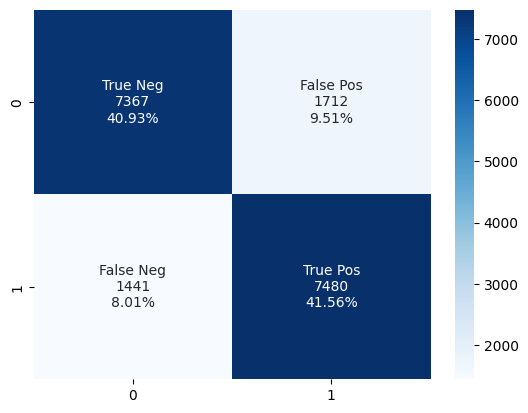

In [30]:
# trian confusion matrix
cf_matrix = confusion_matrix(y_train, predictions_train)
conf_matrix(cf_matrix)

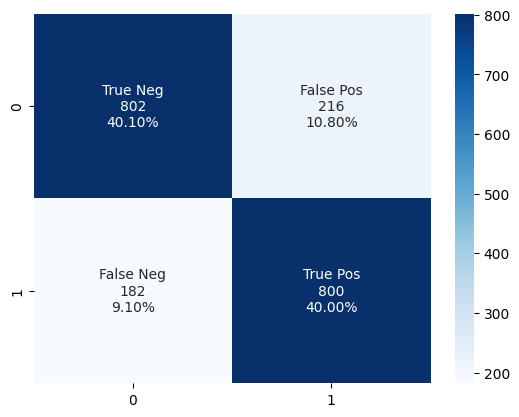

In [31]:
# test confusion matrix
cf_matrix = confusion_matrix(y_test, predictions_test)
conf_matrix(cf_matrix)

In [32]:
print('Train accuracy is {}% while test accuracy is {}%.'.format(round(accuracy_score(y_train, predictions_train),4)*100,round(accuracy_score(y_test, predictions_test),2)*100))
print('Train log loss is {} while test log loss is {}.'.format(log_loss(y_train,predict_proba_train),log_loss(y_test,predict_proba_test)))

Train accuracy is 82.48% while test accuracy is 80.0%.
Train log loss is 0.41846012972281393 while test log loss is 0.46550132360819474.


## Model prediction on oot data

In [33]:
df_oot.head(5)

,review,sentiment
20000,huge fan northern exposure men complete knocko...,0
20001,watched movie let go thought could acting writ...,0
20002,story hare hare actually came dev mind saw fal...,1
20003,oddly enough screwy part screwball comedy lomb...,0
20004,horror comedy like one might get quickly shut ...,0


In [34]:
x_oot=df['review']
y_oot=df['sentiment']

In [35]:
x_oot_features=tokenize.texts_to_sequences(x_oot)
print(x_oot_features[0])

[4, 52, 330, 261, 1, 91, 394, 21, 54, 1, 1, 1, 377, 153, 91, 441, 48, 1, 37, 1, 1, 1, 37, 244, 377, 210, 191, 1, 202, 1, 1, 848, 1, 1, 350, 1, 1, 880, 1, 248, 1, 1, 190, 1, 350, 196, 204, 1, 1, 29, 116, 7, 44, 149, 929, 37, 449, 83, 146, 7, 1, 565, 71, 1, 565, 1, 565, 666, 78, 21, 261, 39, 94, 1, 1, 16, 44, 1, 158, 885, 73, 1, 190, 1, 377, 377, 1, 1, 1, 1, 329, 421, 15, 121, 13, 1, 536, 599, 447, 880, 449, 359, 668, 880, 369, 52, 84, 258, 1, 1, 15, 852, 328]


In [36]:
x_oot_embedded_docs=pad_sequences(x_oot_features,padding='pre',maxlen=sent_length)

In [37]:
print(x_oot_embedded_docs[0])
print(x_oot_embedded_docs[1])

[  0   0   0   0   0   0   0   4  52 330 261   1  91 394  21  54   1   1
   1 377 153  91 441  48   1  37   1   1   1  37 244 377 210 191   1 202
   1   1 848   1   1 350   1   1 880   1 248   1   1 190   1 350 196 204
   1   1  29 116   7  44 149 929  37 449  83 146   7   1 565  71   1 565
   1 565 666  78  21 261  39  94   1   1  16  44   1 158 885  73   1 190
   1 377 377   1   1   1   1 329 421  15 121  13   1 536 599 447 880 449
 359 668 880 369  52  84 258   1   1  15 852 328]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 235  32 219   1   1   1   1 325   1 163
   1 267 259 349  13   1   1  73   1 215  11   1   1  13 144  52   1 282
 259   1 219   4  18  99  40   1  10 138 196  32 817   1 120 191   1 768
 866 818   1 368   1 368 788  66   1   1  13 100]


In [38]:
# model predictions
predict_proba_oot=model.predict(x_oot_embedded_docs)
predictions_oot = (predict_proba_oot > 0.5).astype("int32")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step


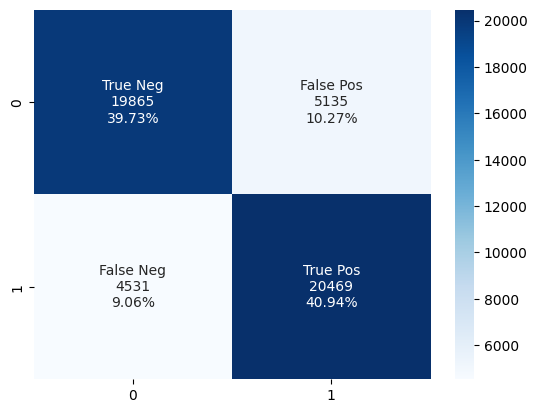

In [39]:
# trian confusion matrix
cf_matrix = confusion_matrix(y_oot, predictions_oot)
conf_matrix(cf_matrix)

In [40]:
print('Train accuracy is {}%, test accuracy is {}% and oot accuracy is {}%.'.format(round(accuracy_score(y_train, predictions_train),4)*100,round(accuracy_score(y_test, predictions_test),2)*100,round(accuracy_score(y_oot, predictions_oot),4)*100))
print('Train log loss is {}, test log loss is {} and oot log loss is {}.'.format(log_loss(y_train,predict_proba_train),log_loss(y_test,predict_proba_test),log_loss(y_oot,predict_proba_oot)))

Train accuracy is 82.48%, test accuracy is 80.0% and oot accuracy is 80.67%.
Train log loss is 0.41846012972281393, test log loss is 0.46550132360819474 and oot log loss is 0.45257293472300814.
